In [1]:
# Necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Specify where to save the processed files as sa vepath
#path = 'H:/Downloads/PhD-Atif/Warren_2019-master'
path = '/Users/frestie/Desktop/DissertationProject/data.txt'

## 2 Loading the raw data

In [3]:
df = pd.read_csv('dat.txt', sep='\t', header=0)

In [4]:
df

,value,id,channel,patient_type,patient_id,replicate,subject_group,patrep_id,cell_id,colour,type
0,3.403409,1,SDHA,control,C02,1,Control,C02R01,C02R01_0001,#0000FF0A,mean intensity
1,3.664688,2,SDHA,control,C02,1,Control,C02R01,C02R01_0002,#0000FF0A,mean intensity
2,6.227979,3,SDHA,control,C02,1,Control,C02R01,C02R01_0003,#0000FF0A,mean intensity
3,3.478873,4,SDHA,control,C02,1,Control,C02R01,C02R01_0004,#0000FF0A,mean intensity
4,4.957944,5,SDHA,control,C02,1,Control,C02R01,C02R01_0005,#0000FF0A,mean intensity
...,...,...,...,...,...,...,...,...,...,...,...
269815,186.000000,751,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0751,#FF00000A,mean intensity
269816,141.000000,752,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0752,#FF00000A,mean intensity
269817,120.000000,753,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0753,#FF00000A,mean intensity
269818,99.000000,754,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0754,#FF00000A,mean intensity


### Exploring the categorical columns

In [5]:
df_categorical = df[['channel','patient_type','patient_id','replicate','subject_group','patrep_id','colour','type']]


In [6]:
for col in df_categorical:
    print(df_categorical[col].unique())

['SDHA' 'LOG_SDHA' 'MED_SDHA' 'NDUFB8' 'LOG_NDUFB8' 'MED_NDUFB8' 'OSCP'
 'LOG_OSCP' 'MED_OSCP' 'GRIM19' 'LOG_GRIM19' 'MED_GRIM19' 'VDAC1'
 'LOG_VDAC1' 'MED_VDAC1' 'COX4+4L2' 'LOG_COX4+4L2' 'MED_COX4+4L2' 'MTCO1'
 'LOG_MTCO1' 'MED_MTCO1' 'UqCRC2' 'LOG_UqCRC2' 'MED_UqCRC2' 'Area'
 'AspectRatio' 'Perimeter' 'Circularity' 'xCoord' 'yCoord']
['control' 'patient']
['C02' 'C01' 'C03' 'P10' 'P04' 'P02' 'P05' 'P01' 'P08' 'P06' 'P03' 'P09'
 'P07']
[1]
['Control' 'MT-TW' 'Deletion' 'CI' 'MT-TL1' 'MT-TG' 'MT-TE']
['C02R01' 'C01R01' 'C03R01' 'P10R01' 'P04R01' 'P02R01' 'P05R01' 'P01R01'
 'P08R01' 'P06R01' 'P03R01' 'P09R01' 'P07R01']
['#0000FF0A' '#FF00000A']
['mean intensity' 'log mean intensity' 'median intensity' 'area'
 'aspect ratio' 'perimeter' 'circularity']


In [7]:
df['channel'] = df['channel'].str.replace('GRIM19','NDUFA13')

In [8]:
df.channel.unique()

array(['SDHA', 'LOG_SDHA', 'MED_SDHA', 'NDUFB8', 'LOG_NDUFB8',
       'MED_NDUFB8', 'OSCP', 'LOG_OSCP', 'MED_OSCP', 'NDUFA13',
       'LOG_NDUFA13', 'MED_NDUFA13', 'VDAC1', 'LOG_VDAC1', 'MED_VDAC1',
       'COX4+4L2', 'LOG_COX4+4L2', 'MED_COX4+4L2', 'MTCO1', 'LOG_MTCO1',
       'MED_MTCO1', 'UqCRC2', 'LOG_UqCRC2', 'MED_UqCRC2', 'Area',
       'AspectRatio', 'Perimeter', 'Circularity', 'xCoord', 'yCoord'],
      dtype=object)

In [9]:
df.groupby('patient_id').cell_id.nunique()

patient_id
C01     148
C02     289
C03     131
P01     337
P02     232
P03    1361
P04     879
P05    1878
P06     808
P07     755
P08     628
P09     946
P10     602
Name: cell_id, dtype: int64

## 3 Reshaping the dataframe 

In [10]:
#df1=df.pivot(index=['cell_id','subject_group'], columns = ['channel'],values =['value'])

df1= pd.pivot_table(df, index=['cell_id','patient_type','subject_group','patient_id','colour'], columns = ['channel'],values =['value'])

In [11]:
pd.set_option('display.max_columns', None)
df1

value  \
channel                                                        Area   
cell_id     patient_type subject_group patient_id colour              
C01R01_0001 control      Control       C01        #0000FF0A   879.0   
C01R01_0002 control      Control       C01        #0000FF0A  2556.0   
C01R01_0003 control      Control       C01        #0000FF0A  6432.0   
C01R01_0004 control      Control       C01        #0000FF0A  3072.0   
C01R01_0005 control      Control       C01        #0000FF0A  8734.5   
...                                                             ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A  1858.0   
P10R01_0599 patient      MT-TW         P10        #FF00000A  3970.5   
P10R01_0600 patient      MT-TW         P10        #FF00000A  1458.0   
P10R01_0601 patient      MT-TW         P10        #FF00000A  1276.5   
P10R01_0602 patient      MT-TW         P10        #FF00000A  1339.5   

                                                                         \
channel                                                     AspectRatio   
cell_id     patient_type subject_group patient_id colour                  
C01R01_0001 control      Control       C01        #0000FF0A    0.448980   
C01R01_0002 control      Control       C01        #0000FF0A    0.876923   
C01R01_0003 control      Control       C01        #0000FF0A    0.800000   
C01R01_0004 control      Control       C01        #0000FF0A    1.157143   
C01R01_0005 control      Control       C01        #0000FF0A    1.595238   
...                                                                 ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A    2.000000   
P10R01_0599 patient      MT-TW         P10        #FF00000A    1.451613   
P10R01_0600 patient      MT-TW         P10        #FF00000A    2.900000   
P10R01_0601 patient      MT-TW         P10        #FF00000A    3.133333   
P10R01_0602 patient      MT-TW         P10        #FF00000A    1.555556   

                                                                        \
channel                                                       COX4+4L2   
cell_id     patient_type subject_group patient_id colour                 
C01R01_0001 control      Control       C01        #0000FF0A   4.926230   
C01R01_0002 control      Control       C01        #0000FF0A   9.064356   
C01R01_0003 control      Control       C01        #0000FF0A   7.408696   
C01R01_0004 control      Control       C01        #0000FF0A   8.756881   
C01R01_0005 control      Control       C01        #0000FF0A   5.994460   
...                                                                ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A   8.157025   
P10R01_0599 patient      MT-TW         P10        #FF00000A   8.354244   
P10R01_0600 patient      MT-TW         P10        #FF00000A  13.741228   
P10R01_0601 patient      MT-TW         P10        #FF00000A  15.060748   
P10R01_0602 patient      MT-TW         P10        #FF00000A   7.575000   

                                                                         \
channel                                                     Circularity   
cell_id     patient_type subject_group patient_id colour                  
C01R01_0001 control      Control       C01        #0000FF0A    0.667624   
C01R01_0002 control      Control       C01        #0000FF0A    0.662271   
C01R01_0003 control      Control       C01        #0000FF0A    0.484423   
C01R01_0004 control      Control       C01        #0000FF0A    0.608063   
C01R01_0005 control      Control       C01        #0000FF0A    0.705084   
...                                                                 ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A    0.240837   
P10R01_0599 patient      MT-TW         P10        #FF00000A    0.409971   
P10R01_0600 patient      MT-TW         P10        #FF00000A    0.198452   
P10R01_0601 patient      MT-TW         P10        #FF00000A    0.228461   
P10R

In [12]:
df2= df1.reset_index()

In [13]:
df2

cell_id patient_type subject_group patient_id     colour   value  \
channel                                                                  Area   
0        C01R01_0001      control       Control        C01  #0000FF0A   879.0   
1        C01R01_0002      control       Control        C01  #0000FF0A  2556.0   
2        C01R01_0003      control       Control        C01  #0000FF0A  6432.0   
3        C01R01_0004      control       Control        C01  #0000FF0A  3072.0   
4        C01R01_0005      control       Control        C01  #0000FF0A  8734.5   
...              ...          ...           ...        ...        ...     ...   
8989     P10R01_0598      patient         MT-TW        P10  #FF00000A  1858.0   
8990     P10R01_0599      patient         MT-TW        P10  #FF00000A  3970.5   
8991     P10R01_0600      patient         MT-TW        P10  #FF00000A  1458.0   
8992     P10R01_0601      patient         MT-TW        P10  #FF00000A  1276.5   
8993     P10R01_0602      patient         MT-TW        P10  #FF00000A  1339.5   

                                                                               \
channel AspectRatio   COX4+4L2 Circularity LOG_COX4+4L2 LOG_MTCO1 LOG_NDUFA13   
0          0.448980   4.926230    0.667624     3.528312  1.512562    1.718303   
1          0.876923   9.064356    0.662271     6.656274  1.763175    2.777602   
2          0.800000   7.408696    0.484423     5.569829  1.652074    2.207175   
3          1.157143   8.756881    0.608063     7.275473  1.843152    2.923391   
4          1.595238   5.994460    0.705084     4.253457  1.421162    1.760127   
...             ...        ...         ...          ...       ...         ...   
8989       2.000000   8.157025    0.240837     6.455170  1.407893    1.904649   
8990       1.451613   8.354244    0.409971     7.325609  1.150830    1.477179   
8991       2.900000  13.741228    0.198452    11.432586  1.307792    1.628173   
8992       3.133333  15.060748    0.228461    13.320255  1.817468    3.064791   
8993       1.555556   7.575000    0.240358     6.022850  1.099101    1.324772   

                                                                            \
channel LOG_NDUFB8   LOG_OSCP   LOG_SDHA LOG_UqCRC2 LOG_VDAC1 MED_COX4+4L2   
0         1.926028   2.092291   2.498110   2.793981  1.574617          4.0   
1         2.671580   2.926415   4.195481   4.720006  1.753394          7.0   
2         2.160935   2.409333   3.632043   3.797937  1.552955          6.0   
3         2.566386   2.976915   4.496332   4.825183  1.750554          8.0   
4         1.769816   2.003908   2.789748   2.704791  1.469509          4.0   
...            ...        ...        ...        ...       ...          ...   
8989      1.519806  10.240695  13.661039  10.582099  2.976675          7.0   
8990      1.191700  21.188446  44.385100  14.004130  5.544963          8.0   
8991      1.312752  40.187626  63.152782  28.195734  9.497522         12.0   
8992      2.606018   4.084147   5.848844   8.787500  2.405839         14.0   
8993      1.206204  14.693705  33.566143   9.559546  4.394516          6.0   

                                                                       \
channel MED_MTCO1 MED_NDUFA13 MED_NDUFB8 MED_OSCP MED_SDHA MED_UqCRC2   
0             1.0         2.0        2.0      2.0      2.0        3.0   
1             2.0         3.0        3.0      3.0      4.0        5.0   
2             2.0         2.0        2.0      2.0      4.0        4.0   
3             2.0         3.0        3.0      3.0      5.0        5.0   
4             1.0         2.0        2.0      2.0      3.0        3.0   
...           ...         ...        ...      ...      ...        ...   
8989          1.0         2.0        1.0     11.0     15.0       10.0   
8990          1.0         1.0        1.0     23.0     47.0       15.0   
8991          1.0         1.0        1.0     41.0     62.0       30.0   
8992          2.0         3.0        3.0      4.0      6.0        9.0   
8993          

In [14]:
df2= df2.rename(columns={"value":""})

In [15]:
list(df2.columns)

[('cell_id', ''),
 ('patient_type', ''),
 ('subject_group', ''),
 ('patient_id', ''),
 ('colour', ''),
 ('', 'Area'),
 ('', 'AspectRatio'),
 ('', 'COX4+4L2'),
 ('', 'Circularity'),
 ('', 'LOG_COX4+4L2'),
 ('', 'LOG_MTCO1'),
 ('', 'LOG_NDUFA13'),
 ('', 'LOG_NDUFB8'),
 ('', 'LOG_OSCP'),
 ('', 'LOG_SDHA'),
 ('', 'LOG_UqCRC2'),
 ('', 'LOG_VDAC1'),
 ('', 'MED_COX4+4L2'),
 ('', 'MED_MTCO1'),
 ('', 'MED_NDUFA13'),
 ('', 'MED_NDUFB8'),
 ('', 'MED_OSCP'),
 ('', 'MED_SDHA'),
 ('', 'MED_UqCRC2'),
 ('', 'MED_VDAC1'),
 ('', 'MTCO1'),
 ('', 'NDUFA13'),
 ('', 'NDUFB8'),
 ('', 'OSCP'),
 ('', 'Perimeter'),
 ('', 'SDHA'),
 ('', 'UqCRC2'),
 ('', 'VDAC1'),
 ('', 'xCoord'),
 ('', 'yCoord')]

In [16]:
df2.columns = [f'{i}{j}' for i, j in df2.columns]
df2.columns = df2.columns.map(''.join)
#df2.columns = df2.columns.map('{0[0]}{0[1]}'.format) 

In [17]:
df2

,cell_id,patient_type,subject_group,patient_id,colour,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord
0,C01R01_0001,control,Control,C01,#0000FF0A,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0
1,C01R01_0002,control,Control,C01,#0000FF0A,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0
2,C01R01_0003,control,Control,C01,#0000FF0A,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0
3,C01R01_0004,control,Control,C01,#0000FF0A,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0
4,C01R01_0005,control,Control,C01,#0000FF0A,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,P10R01_0598,patient,MT-TW,P10,#FF00000A,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0
8990,P10R01_0599,patient,MT-TW,P10,#FF00000A,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0
8991,P10R01_0600,patient,MT-TW,P10,#FF00000A,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312752,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0
8992,P10R01_0601,patient,MT-TW,P10,#FF00000A,1276.5,3.133333,15.060748,0.228461,13.320255,1.817468,3.064791,2.606018,4.084147,5.848844,8.787500,2.405839,14.0,2.0,3.0,3.0,4.0,6.0,9.0,2.0,2.135514,3.644860,3.056075,5.051402,264.977702,7.032710,10.261682,2.957944,1079.0,58.0


## 4 Including necessary Columns

In [18]:
df = df2[['cell_id', 'patient_type', 'patient_id', 'subject_group', 'LOG_NDUFA13','LOG_NDUFB8','LOG_MTCO1', 'LOG_COX4+4L2', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1']]
print (df)

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
0     C01R01_0001      control        C01       Control     1.718303   
1     C01R01_0002      control        C01       Control     2.777602   
2     C01R01_0003      control        C01       Control     2.207175   
3     C01R01_0004      control        C01       Control     2.923391   
4     C01R01_0005      control        C01       Control     1.760127   
...           ...          ...        ...           ...          ...   
8989  P10R01_0598      patient        P10         MT-TW     1.904649   
8990  P10R01_0599      patient        P10         MT-TW     1.477179   
8991  P10R01_0600      patient        P10         MT-TW     1.628173   
8992  P10R01_0601      patient        P10         MT-TW     3.064791   
8993  P10R01_0602      patient        P10         MT-TW     1.324772   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
0       1.926028   1.512562      3.528312   2.092291   2

## 5 Exploratory Data Analysis 

In [59]:
df_eda = df

<AxesSubplot:>

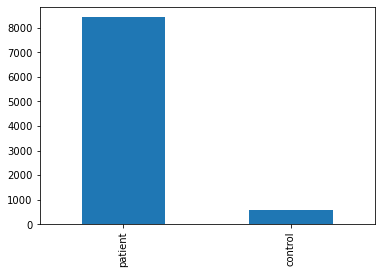

In [46]:
df_eda.patient_type.value_counts().plot(kind='bar')

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
7861  P09R01_0416      patient        P09         MT-TE     2.918975   
1608  P03R01_0472      patient        P03      Deletion     1.646124   
665   P01R01_0098      patient        P01            CI     1.560053   
668   P01R01_0101      patient        P01            CI     1.437705   
670   P01R01_0103      patient        P01            CI     1.809982   
...           ...          ...        ...           ...          ...   
8170  P09R01_0725      patient        P09         MT-TE     1.660437   
8178  P09R01_0733      patient        P09         MT-TE     3.486966   
8139  P09R01_0694      patient        P09         MT-TE     4.747391   
8075  P09R01_0630      patient        P09         MT-TE     2.354268   
0     C01R01_0001      control        C01       Control     1.718303   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
7861    2.931765   1.951142      9.043241   2.482918   5

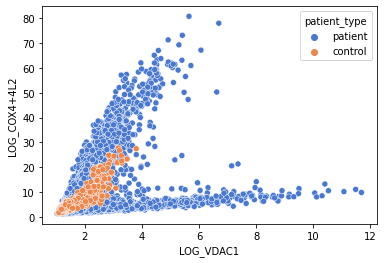

In [63]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_COX4+4L2", hue="patient_type", data=df_eda, palette = 'muted')
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 1 
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 2
df_eda = df_eda.sort_values(by=['Top'], ascending=True)
print(df_eda)

In [ ]:
import matplotlib.pyplot as plt

grouped = df.groupby("patient_type")

grouped = df.groupby("LOG_COX4+4L2")

grouped = df.groupby(["patient_type", "LOG_COX4+4L2"])

print(grouped)

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
4467  P05R01_1091      patient        P05        MT-TL1     2.529020   
5592  P06R01_0338      patient        P06        MT-TL1     8.014024   
6178  P07R01_0116      patient        P07        MT-TL1     1.463927   
6175  P07R01_0113      patient        P07        MT-TL1     1.113499   
6173  P07R01_0111      patient        P07        MT-TL1     1.367947   
...           ...          ...        ...           ...          ...   
2589  P04R01_0092      patient        P04      Deletion     2.386006   
2535  P04R01_0038      patient        P04      Deletion     3.996676   
3110  P04R01_0613      patient        P04      Deletion     3.524824   
3172  P04R01_0675      patient        P04      Deletion     3.420972   
0     C01R01_0001      control        C01       Control     1.718303   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
4467    2.160038   1.850086      7.921674   2.624975   4

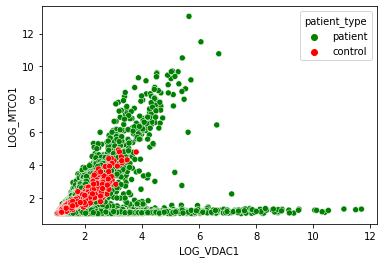

In [54]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_MTCO1", hue="patient_type", palette=['green','red'], data=df_eda)
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 1 
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 2
df_eda = df_eda.sort_values(by=['Top'], ascending=True)
print(df_eda)

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
0     C01R01_0001      control        C01       Control     1.718303   
240   C02R01_0093      control        C02       Control     1.720983   
219   C02R01_0072      control        C02       Control     1.344015   
203   C02R01_0056      control        C02       Control     2.192479   
29    C01R01_0030      control        C01       Control     2.475528   
...           ...          ...        ...           ...          ...   
8802  P10R01_0411      patient        P10         MT-TW     1.293316   
8169  P09R01_0724      patient        P09         MT-TE     1.623686   
8141  P09R01_0696      patient        P09         MT-TE     3.846453   
8815  P10R01_0424      patient        P10         MT-TW     1.323499   
7644  P09R01_0199      patient        P09         MT-TE     4.084507   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
0       1.926028   1.512562      3.528312   2.092291   2

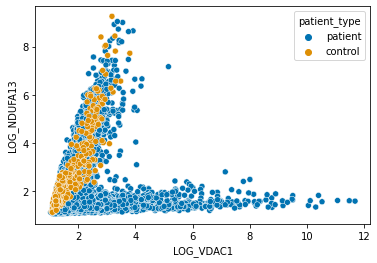

In [65]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_NDUFA13", hue="patient_type",palette='colorblind', data=df_eda)
df_eda.loc[df_eda['patient_type'] == 'control', 'Top'] = 1 
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 2
df_eda = df_eda.sort_values(by=['Top'], ascending=True)
print(df_eda)

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
8815  P10R01_0424      patient        P10         MT-TW     1.323499   
913   P02R01_0009      patient        P02            CI     1.457846   
2338  P03R01_1202      patient        P03      Deletion     1.888818   
2302  P03R01_1166      patient        P03      Deletion     1.249046   
2303  P03R01_1167      patient        P03      Deletion     1.093483   
...           ...          ...        ...           ...          ...   
224   C02R01_0077      control        C02       Control     1.191290   
170   C02R01_0023      control        C02       Control     2.339782   
258   C02R01_0111      control        C02       Control     1.463914   
259   C02R01_0112      control        C02       Control     1.233669   
0     C01R01_0001      control        C01       Control     1.718303   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
8815    1.143525   1.080217      5.181319  13.762631  21

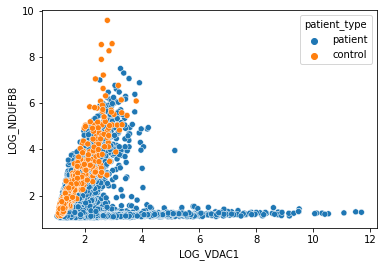

In [69]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_NDUFB8", hue="patient_type", data=df_eda)
df_eda.loc[df_eda['patient_type'] == 'control', 'Top'] = 1 
df_eda.loc[df_eda['patient_type'] == 'control', 'Top'] = 2
df_eda = df_eda.sort_values(by=['Top'], ascending=True)
print(df_eda)

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
7745  P09R01_0300      patient        P09         MT-TE     1.708789   
784   P01R01_0217      patient        P01            CI     1.251920   
2308  P03R01_1172      patient        P03      Deletion     1.800877   
949   P02R01_0045      patient        P02            CI     1.316190   
2291  P03R01_1155      patient        P03      Deletion     1.392379   
...           ...          ...        ...           ...          ...   
8371  P09R01_0926      patient        P09         MT-TE     7.569348   
8414  P10R01_0023      patient        P10         MT-TW     1.344478   
8453  P10R01_0062      patient        P10         MT-TW     1.227438   
8019  P09R01_0574      patient        P09         MT-TE     1.351403   
0     C01R01_0001      control        C01       Control     1.718303   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
7745    1.645350   1.367323      3.845410   1.709148   2

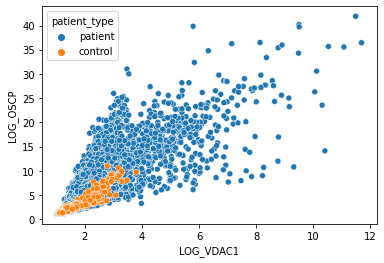

In [73]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_OSCP", hue="patient_type", data=df_eda)
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 1 
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 2
df_eda = df_eda.sort_values(by=['Top'], ascending=True)
print(df_eda)

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
3240  P04R01_0743      patient        P04      Deletion     3.840730   
1452  P03R01_0316      patient        P03      Deletion     1.573199   
878   P01R01_0311      patient        P01            CI     1.348209   
1667  P03R01_0531      patient        P03      Deletion     1.404929   
865   P01R01_0298      patient        P01            CI     1.547679   
...           ...          ...        ...           ...          ...   
8842  P10R01_0451      patient        P10         MT-TW     1.178490   
8419  P10R01_0028      patient        P10         MT-TW     1.215619   
8202  P09R01_0757      patient        P09         MT-TE     1.731730   
7972  P09R01_0527      patient        P09         MT-TE     1.117843   
0     C01R01_0001      control        C01       Control     1.718303   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
3240    2.541566   2.523295     14.775892   4.647924   8

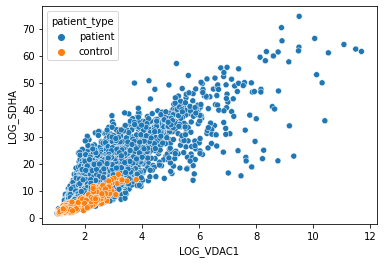

In [79]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_SDHA", hue="patient_type", data=df_eda)
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 1 
df_eda.loc[df_eda['patient_type'] == 'patient', 'Top'] = 2
df_eda = df_eda.sort_values(by=['Top'], ascending=True)
print(df_eda)

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
6727  P07R01_0665      patient        P07        MT-TL1     1.558894   
883   P01R01_0316      patient        P01            CI     1.570750   
837   P01R01_0270      patient        P01            CI     1.364609   
2321  P03R01_1185      patient        P03      Deletion     1.494913   
1554  P03R01_0418      patient        P03      Deletion     2.546864   
...           ...          ...        ...           ...          ...   
450   C03R01_0014      control        C03       Control     3.681048   
252   C02R01_0105      control        C02       Control     2.181543   
259   C02R01_0112      control        C02       Control     1.233669   
31    C01R01_0032      control        C01       Control     1.473069   
0     C01R01_0001      control        C01       Control     1.718303   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
6727    1.178550   2.169498     16.510347   8.858039  21

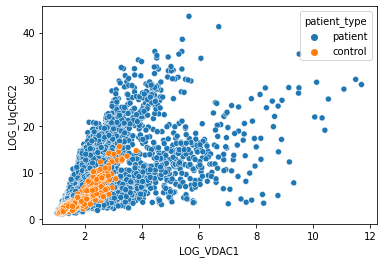

In [85]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_UqCRC2", hue="patient_type", data=df_eda)
df_eda.loc[df_eda['patient_type'] == 'control', 'Top'] = 1 
df_eda.loc[df_eda['patient_type'] == 'control', 'Top'] = 2
df_eda = df_eda.sort_values(by=['Top'], ascending=True)
print(df_eda)

# Fibre Classification Using Clustering Algorithms

## 6a K-means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from time import time
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df3 = df
df3 == df3

X = df3[['LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1' ]]
labels = df3[['cell_id']]

labels.cell_id = labels.cell_id.astype("category")
labels.cell_id = labels.cell_id.cat.codes
labels.cell_id = labels.cell_id.astype("int")

cls = KMeans(n_clusters = 2)
lab = cls.fit(X)
lab.labels_

In [ ]:
#K-means predicting who are patients an who are control
df3['patient_id'] = lab.labels_
print(df3['patient_id'])

## 7a Visualise Results

In [ ]:
dic = {0:"Blue", 1:"Red"}
sns.scatterplot(x=X.LOG_VDAC1, y=X.LOG_NDUFA13, data=df3, hue="patient_id", palette = dic)

In [ ]:
dic = {0:"Blue", 1:"Red"}
sns.scatterplot(x=X.LOG_VDAC1, y=X.LOG_NDUFB8, data=df3, hue="patient_id", palette = dic)

## 8a Number of each individual's fibres are in each group

In [ ]:
df = df2[['cell_id', 'patient_type', 'patient_id', 'subject_group', 'LOG_NDUFA13','LOG_NDUFB8','LOG_MTCO1', 'LOG_COX4+4L2', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1']]

print ("For Control 1:")
C1 = df['patient_id'].str.contains('C01', regex=False, case=False, na=False).value_counts()
print(C1)
(df3['patient_id'][:148])


## next check how many 0 and 1 in rows 1:148
control1a = (df3['patient_id'][:148] == 0).sum(axis = 0)
print('healthy = ', control1a)
control1b = (df3['patient_id'][:148] == 1).sum(axis = 0)
print('disease = ', control1b)

In [ ]:
print ("For Control 2:")
C2 = df['patient_id'].str.contains('C02', regex=False, case=False, na=False).value_counts()
print(C2)
(df3['patient_id'][148:437])


## next check how many 0 and 1 in rows 148:437
control2a = (df3['patient_id'][148:437] == 0).sum(axis = 0)
print('healthy = ', control2a)
control2b = (df3['patient_id'][148:437] == 1).sum(axis = 0)
print('disease = ', control2b)

In [ ]:
print ("For Control 3:")
C3 = df['patient_id'].str.contains('C03', regex=False, case=False, na=False).value_counts()
print(C3)
(df3['patient_id'][437:568])


## next check how many 0 and 1 in rows 437:568
control3a = (df3['patient_id'][437:568] == 0).sum(axis = 0)
print('healthy = ', control3a)
control3b = (df3['patient_id'][437:568] == 1).sum(axis = 0)
print('disease = ', control3b)

In [ ]:
print ("For Patient 1:")
P1 = df['patient_id'].str.contains('P01', regex=False, case=False, na=False).value_counts()
print(P1)
(df3['patient_id'][568:905])


## next check how many 0 and 1 in rows 568:905
patient1 = (df3['patient_id'][568:905] == 0).sum(axis = 0)
print('healthy = ', patient1)
patient1b = (df3['patient_id'][568:905] == 1).sum(axis = 0)
print('disease = ', patient1b)

In [ ]:
print ("For Patient 2:")
P2 = df['patient_id'].str.contains('P02', regex=False, case=False, na=False).value_counts()
print(P2)
(df3['patient_id'][905:1137])


## next check how many 0 and 1 in rows 905:1137
patient2 = (df3['patient_id'][905:1137] == 0).sum(axis = 0)
print('healthy = ', patient2)
patient2b = (df3['patient_id'][905:1137] == 1).sum(axis = 0)
print('disease = ', patient2b)

In [ ]:
print ("For Patient 3:")
P3 = df['patient_id'].str.contains('P03', regex=False, case=False, na=False).value_counts()
print(P3)
(df3['patient_id'][1137:2498])


## next check how many 0 and 1 in rows 1137:2498
patient3 = (df3['patient_id'][1137:2498] == 0).sum(axis = 0)
print('healthy = ', patient3)
patient3b = (df3['patient_id'][1137:2498] == 1).sum(axis = 0)
print('disease = ', patient3b)

In [ ]:
print ("For Patient 4:")
P4 = df['patient_id'].str.contains('P04', regex=False, case=False, na=False).value_counts()
print(P4)
(df3['patient_id'][2498:3377])


## next check how many 0 and 1 in rows 2498:3377
patient4 = (df3['patient_id'][2498:3377] == 0).sum(axis = 0)
print('healthy = ', patient4)
patient4b = (df3['patient_id'][2498:3377] == 1).sum(axis = 0)
print('disease = ', patient4b)

In [ ]:
print ("For Patient 5:")
P5 = df['patient_id'].str.contains('P05', regex=False, case=False, na=False).value_counts()
print(P5)
(df3['patient_id'][3377:5255])


## next check how many 0 and 1 in rows 3377:5255
patient5 = (df3['patient_id'][3377:5255] == 0).sum(axis = 0)
print('healthy = ', patient5)
patient5b = (df3['patient_id'][3377:5255] == 1).sum(axis = 0)
print('disease = ', patient5b)

In [ ]:
print ("For Patient 6:")
P6 = df['patient_id'].str.contains('P06', regex=False, case=False, na=False).value_counts()
print(P6)
(df3['patient_id'][5255:6063])


## next check how many 0 and 1 in rows 5255:6063
patient6 = (df3['patient_id'][5255:6063] == 0).sum(axis = 0)
print('healthy = ', patient6)
patient6b = (df3['patient_id'][5255:6063] == 1).sum(axis = 0)
print('disease = ', patient6b)

In [ ]:
print ("For Patient 7:")
P7 = df['patient_id'].str.contains('P07', regex=False, case=False, na=False).value_counts()
print(P7)
(df3['patient_id'][6063:6818])


## next check how many 0 and 1 in rows 6063:6818
patient7 = (df3['patient_id'][6063:6818] == 0).sum(axis = 0)
print('healthy = ', patient7)
patient7b = (df3['patient_id'][6063:6818] == 1).sum(axis = 0)
print('disease = ', patient7b)

In [ ]:
print ("For Patient 8:")
P8 = df['patient_id'].str.contains('P08', regex=False, case=False, na=False).value_counts()
print(P8)
(df3['patient_id'][6818:7446])


## next check how many 0 and 1 in rows 6818:7446
patient8 = (df3['patient_id'][6818:7446] == 0).sum(axis = 0)
print('healthy = ', patient8)
patient8b = (df3['patient_id'][6818:7446] == 1).sum(axis = 0)
print('disease = ', patient8b)

In [ ]:
print ("For Patient 9:")
P9 = df['patient_id'].str.contains('P09', regex=False, case=False, na=False).value_counts()
print(P9)
(df3['patient_id'][7446:8392])


## next check how many 0 and 1 in rows 7446:8392
patient9 = (df3['patient_id'][7446:8392] == 0).sum(axis = 0)
print('healthy = ', patient9)
patient9b = (df3['patient_id'][7446:8392] == 1).sum(axis = 0)
print('disease = ', patient9b)

In [ ]:
print ("For Patient 10:")
P10 = df['patient_id'].str.contains('P10', regex=False, case=False, na=False).value_counts()
print(P10)
(df3['patient_id'][8392:8994])


## next check how many 0 and 1 in rows 8392:8994
patient10 = (df3['patient_id'][8392:8994] == 0).sum(axis = 0)
print('healthy = ', patient10)
patient10b = (df3['patient_id'][8392:8994] == 1).sum(axis = 0)
print('disease = ', patient10b)

## 9a Number of each Subject Type with fibres in each group

In [ ]:
print ("For Control:")
TotalControl = df['subject_group'].str.contains('Control', regex=False, case=False, na=False).value_counts()
print(TotalControl)
(df3['subject_group'][:568])


## next check how many 0 and 1 in rows 1-568
Contr = (df3['patient_id'][:568] == 0).sum(axis = 0)
print('Total number of healthy fibres = ',Contr)
Contr2 = (df3['patient_id'][:568] == 1).sum(axis = 0)
print('Total number of disease fibres = ',Contr2)

In [ ]:
print ("For CI: ") ## patients 1 and 2
TotalCI= df['subject_group'].str.contains('CI', regex=False, case=False, na=False).value_counts()
print(TotalCI)
(df3['subject_group'][568:1137])


## next check how many 0 and 1 in CI
CI = (df3['patient_id'][568:1137] == 0).sum(axis = 0)
print('Total number of healthy fibres = ',CI)
CI2 = (df3['patient_id'][568:1137] == 1).sum(axis = 0)
print('Total number of disease fibres = ',CI2)

In [ ]:
print ("For Deletion: ") ## patients 3 and 4
Totaldel= df['subject_group'].str.contains('Deletion', regex=False, case=False, na=False).value_counts()
print(Totaldel)
(df3['subject_group'][1137:3377])


## next check how many 0 and 1 in CI
Del = (df3['patient_id'][1137:3377] == 0).sum(axis = 0)
print('Total number of healthy fibres = ', Del)
Del2 = (df3['patient_id'][1137:3377] == 1).sum(axis = 0)
print('Total number of disease fibres = ', Del2)

In [ ]:
print ("For MT-TL1: ") ## patients 5, 6 and 7
Totalmttl1= df['subject_group'].str.contains('MT-TL1', regex=False, case=False, na=False).value_counts()
print(Totalmttl1)
(df3['subject_group'][3377:6818])


## next check how many 0 and 1 in CI
MTTL1 = (df3['patient_id'][3377:6818] == 0).sum(axis = 0)
print('Total number of healthy fibres = ',MTTL1)
MTTL1b = (df3['patient_id'][3377:6818] == 1).sum(axis = 0)
print('Total number of disease fibres = ',MTTL1b)

In [ ]:
print ("For MT-TG: ")  ## same as result of pt 8 as only sample with this disease
Totalmttg= df['subject_group'].str.contains('MT-TG', regex=False, case=False, na=False).value_counts()
print(Totalmttg)
(df3['subject_group'][6818:7446])


## next check how many 0 and 1 in CI
MTTG = (df3['patient_id'][6818:7446] == 0).sum(axis = 0)
print('Total number of healthy fibres = ', MTTG)
MTTGb = (df3['patient_id'][6818:7446] == 1).sum(axis = 0)
print('Total number of disease fibres = ', MTTGb)
##so 564 are coming as control and 64 as patient fibres.

In [ ]:
print ("For MT-TE: ") ## same as result of pt 9 as only sample with this disease
TotalCI= df['subject_group'].str.contains('MT-TE', regex=False, case=False, na=False).value_counts()
print(TotalCI)
(df3['subject_group'][7446:8392])


## next check how many 0 and 1 in CI
MTTE = (df3['patient_id'][7446:8392] == 0).sum(axis = 0)
print('Total number of healthy fibres = ', MTTE)
MTTEb = (df3['patient_id'][7446:8392] == 1).sum(axis = 0)
print('Total number of disease fibres = ', MTTEb)

In [ ]:
print ("For MT-TW: ") ## same as result of pt 10 as only sample with this disease
Totalmttw= df['subject_group'].str.contains('MT-TW', regex=False, case=False, na=False).value_counts()
print(Totalmttw)
(df3['subject_group'][8392:8994])


## next check how many 0 and 1 in CI
MTTW = (df3['patient_id'][8392:8994] == 0).sum(axis = 0)
print('Total number of healthy fibres = ', MTTW)
MTTWb = (df3['patient_id'][8392:8994] == 1).sum(axis = 0)
print('Total number of disease fibres = ', MTTWb)

## 6b GMM

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

df4 = df
df4 == df4

Xx = df4[['LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1' ]]
labels = df4[['cell_id']]

labels.cell_id = labels.cell_id.astype("category")
labels.cell_id = labels.cell_id.cat.codes
labels.cell_id = labels.cell_id.astype("int")

clsgmm = GMM(n_components = 2)
clsgmm.fit(Xx)

In [ ]:
predictLabels = cls.fit_predict(Xx,Xx)

print(classification_report(labels.cell_id,predictLabels))

In [ ]:
df5 = df[['LOG_NDUFA13', 'LOG_VDAC1']]
print(df5)

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(df5)

#predictions from gmm
pred = gmm.predict(df5)
frame = pd.DataFrame(df5)
frame['cluster'] = pred
frame.columns = ['LOG_NDUFA13', 'LOG_VDAC1', 'cluster']

color=['blue','green', 'cyan', 'red']
for k in range(0,4):
    df5 = frame[frame["cluster"]==k]
    plt.scatter(df5["LOG_VDAC1"], df5["LOG_NDUFA13"], c=color[k])
plt.show()

In [ ]:
df6 = df[['LOG_NDUFB8', 'LOG_VDAC1']]
print(df6)

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(df6)

#predictions from gmm
preds = gmm.predict(df6)
frame = pd.DataFrame(df6)
frame['cluster'] = preds
frame.columns = ['LOG_NDUFB8', 'LOG_VDAC1', 'cluster']

color=['blue','green', 'cyan', 'red']
for k in range(0,4):
    df5 = frame[frame["cluster"]==k]
    plt.scatter(df6["LOG_VDAC1"], df6["LOG_NDUFB8"], c=color[k])
plt.show()